<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
# insert code here

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

In [74]:
import keras
import tensorflow as tf

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

Keras version:  2.5.0
Tensorflow version:  2.5.0


## Load data
Use the **Keras**' load method.

In [15]:
# insert code here
data = tf.keras.datasets.cifar10.load_data()[0]

## Check some data

In [18]:
# insert code here
data[1]

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Prepare data

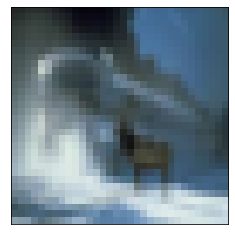

In [40]:
# insert code here
id = np.random.randint(len(data[1]))
plt.figure(figsize = (4, 4))
plt.imshow(data[0][id])
plt.xticks([])
plt.yticks([])
plt.show()

In [60]:
# input
X = data[0]
img_rows, img_cols = X[0][:,:,0].shape
#X = X.reshape(X.shape[0], img_rows, img_cols, 3)

# output
target = data[1].astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target.reshape(1,50000)[0])),
    dtype = 'uint8')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [88]:
# insert code here
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(60,
                 kernel_size = 4,
                 activation = 'relu',
                 data_format = 'channels_last',
                 padding = 'valid',
                 input_shape = (img_rows, img_cols, 3)))

# Add another convolutional layer
model.add(Conv2D(30,
                 kernel_size = 2,
                 activation = 'relu'))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add an output layer for the 3 categories
model.add(Dense(len(set(target.reshape(1,50000)[0])),
                activation = 'softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 29, 29, 60)        2940      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 30)        7230      
_________________________________________________________________
flatten_4 (Flatten)          (None, 23520)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                235210    
Total params: 245,380
Trainable params: 245,380
Non-trainable params: 0
_________________________________________________________________
None


## Compile the model

In [89]:
# insert code here
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [106]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 9,
    batch_size = 10)

TypeError: fit() got an unexpected keyword argument 'nb_epochs'

In [ ]:
%%time
# insert code here

# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [91]:
%%time
predictions = model.predict_classes(X_test)

CPU times: user 8.08 s, sys: 911 ms, total: 8.99 s
Wall time: 3.41 s


## Evaluate the model

In [97]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 4s 4ms/step - loss: 2.6813 - accuracy: 0.1100

Test loss: 2.681270, Test accuracy: 0.110000


## Visualisation of cost

In [103]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r = 'r%%0%dd' % d_size
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [104]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
 0|   9   4   8   7 936   5   4   6   3   5 
 1|   6  23   3  10 912   5   7   7  17  19 
 2|   9   6   7  10 914   3   5   5   6   5 
 3|   8  12   7  17 928  11  20  14  12  13 
 4|   4   5   1   6 955   4   2   4   2   3 
 5|   5  11   5  18 905  20  11  15   6   7 
 6|   7  13   3   9 944   9  23  10   8   2 
 7|   6   7   8  11 926   6   8  18   4   6 
 8|  12   9   4   2 973   3   1   5  13   5 
 9|  10  22   3   9 855   7   7   5  15  15 


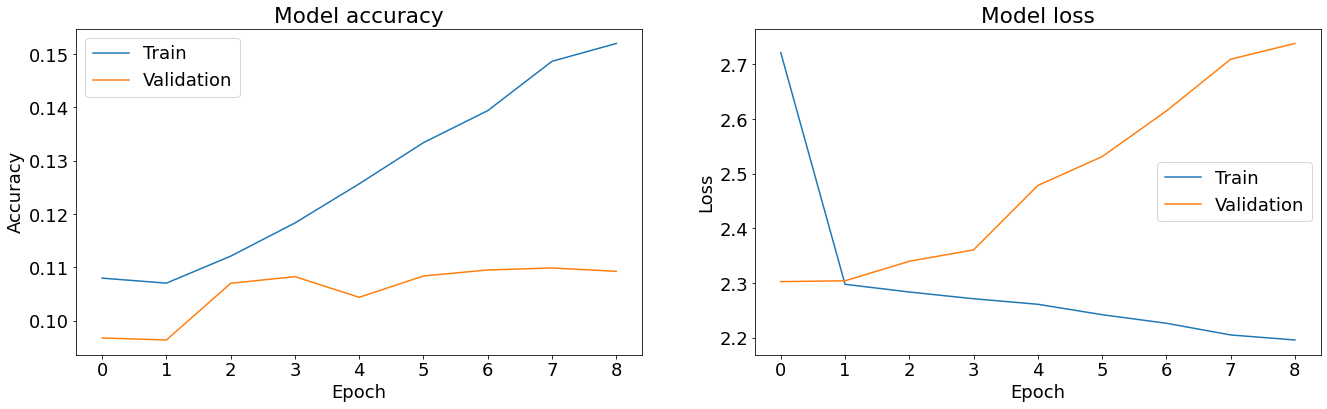

In [120]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

In [186]:
def find_class(array):
    my_array = []
    for row in array:
        my_array = my_array + [row.argmax()]
    my_array = np.array(my_array)
    return my_array

In [169]:
id = np.random.randint(len(data[1]))
def show_image(id):
    plt.figure(figsize = (4, 4))
    plt.imshow(data[0][id])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return print(data[1][id])

In [198]:
def example_image(n):
    index = (predictions.reshape(1,10000)[0]==n)
    image_base = X_test[index]
    pic_id = np.random.choice(len(image_base))
    sample_image = X_test[pic_id]
    return sample_image

example_image(1)

array([[[251, 254, 250],
        [250, 248, 247],
        [248, 246, 245],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[254, 255, 254],
        [238, 239, 236],
        [217, 222, 217],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[248, 251, 250],
        [196, 202, 197],
        [144, 155, 147],
        ...,
        [248, 250, 249],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[248, 244, 230],
        [223, 218, 186],
        [217, 209, 164],
        ...,
        [225, 218, 170],
        [240, 237, 209],
        [251, 248, 235]],

       [[254, 253, 243],
        [241, 239, 220],
        [237, 232, 205],
        ...,
        [242, 236, 211],
        [251, 249, 234],
        [254, 254, 245]],

       [[255, 255, 254],
        [252, 252, 247],
        [252, 250, 242],
        ...,
        [251, 247, 239],
        [254, 254, 249],
        [254, 255, 250]]

In [191]:
y_true = find_class(y_test)

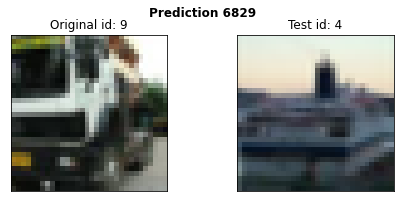

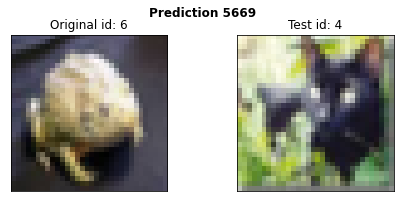

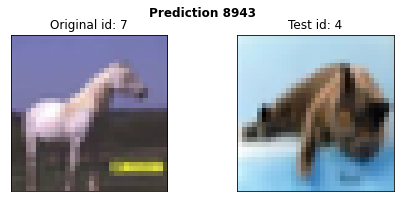

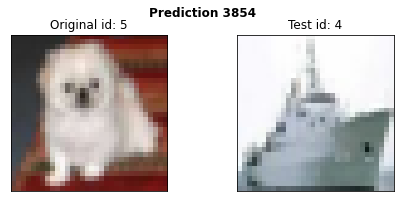

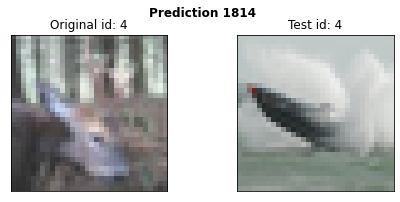

In [205]:
random_im_index = np.random.choice(10000, 5)

for n in random_im_index:
    true_image = X_test[n]
    true_class = y_true[n]
    pred_class = predictions[n]
    example_im = example_image(true_class)
    implot2(true_image, example_im, n)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



